### Tanimoto coefficient, Tanimoto distance

In [1]:
import pandas as pd
from rdkit import Chem 
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Descriptors, DataStructs, Draw
from rdkit.Chem import rdFingerprintGenerator
from matplotlib import pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'rdkit'

In [2]:
SA = 'c1ccc(c(c1)C(=O)O)O'
PASA = 'C1=CC(=C(C=C1N)O)C(=O)O'

In [3]:
SA = Chem.MolFromSmiles(SA)
PASA = Chem.MolFromSmiles(PASA)

NameError: name 'Chem' is not defined

In [4]:
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

NameError: name 'rdFingerprintGenerator' is not defined

In [5]:
SA_fp = rdkit_gen.GetFingerprint(SA)
PASA_fp = rdkit_gen.GetFingerprint(PASA)

NameError: name 'rdkit_gen' is not defined

In [6]:
sim = round(Chem.DataStructs.TanimotoSimilarity(SA_fp, PASA_fp), 3)
sim

NameError: name 'Chem' is not defined

In [7]:
tanimoto_distance = round(1-sim, 3)
tanimoto_distance

NameError: name 'sim' is not defined

In [8]:
data = pd.read_csv('Data_ML.csv')

In [9]:
compounds = []
for _, chembl_id, smile in data[['molecule_chembl_id', 'Smiles']].itertuples():
    compounds.append((Chem.MolFromSmiles(smile), chembl_id))
compounds[:5]

NameError: name 'Chem' is not defined

In [10]:
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
fingerprints = [rdkit_gen.GetFingerprint(mol) for mol, indx in compounds]

NameError: name 'rdFingerprintGenerator' is not defined

In [11]:
fingerprints[0:5]

In [12]:
def tanimoto_distance_matrix(fp_list):
    dissimilarity_matrix = []
    for i in range(1, len(fp_list)):
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [13]:
def cluster_fingerprints(fingerprints, cutoff=0.2):
    tdm = tanimoto_distance_matrix(fingerprints)
    clusters = Butina.ClusterData(tdm, len(fingerprints), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

In [14]:
clusters = cluster_fingerprints(fingerprints, cutoff=0.25)

num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

print("total # clusters: ", len(clusters))
print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)

total # clusters:  40
# clusters with only 1 compound:  18
# clusters with >5 compounds:  8
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


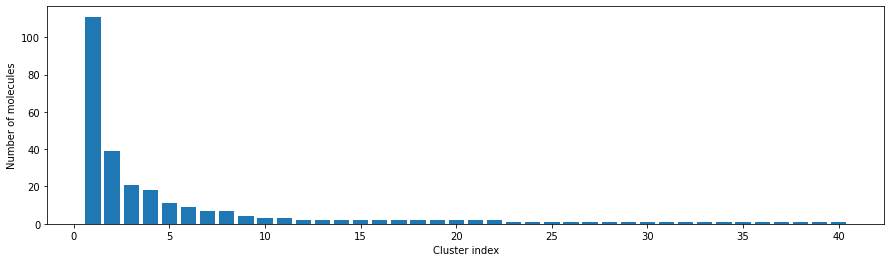

In [15]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("Number of molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5);

In [19]:
len(clusters[0])

111

Centroid molecules from first 7clusters:


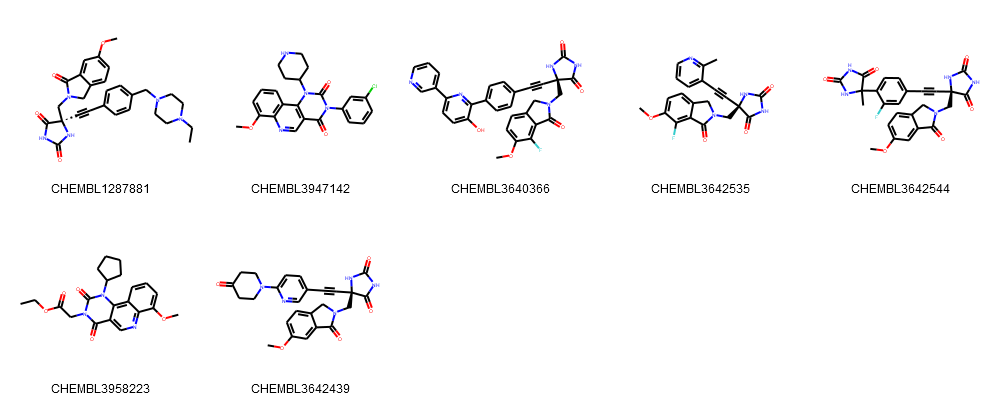

In [25]:
print("Centroid molecules from first 7 clusters:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[clusters[i][0]][0] for i in range(7)],
    legends=[compounds[clusters[i][0]][1] for i in range(7)],
    molsPerRow=5,
)